In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../../")
from src import soporte_ajuste as sa

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../../data/cooked/datos_cluster.csv', encoding='ISO-8859-1', index_col=0)
df.head(2)

df1 = df[df["clusters_kmeans"] == 0]
print(df1.shape[0])
df2 = df[df["clusters_kmeans"] == 1]
print(df2.shape[0])
df3 = df[df["clusters_kmeans"] == 2]
print(df3.shape[0])
df1 = df1.drop(columns="clusters_kmeans")
df1.columns

47511
498
198


Index(['Order Date', 'Ship Mode', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Shipping Cost',
       'Order Priority', 'Profit_respuesta'],
      dtype='object')

In [7]:
GestorModelo = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_respuesta')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

GestorModelo.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

df_resultados = GestorModelo.obtener_resultados()
df_resultados.sample(3)

,Real,Predicho,Conjunto,Modelo,Residuos
20975,81.36,45.41,Train,tree,35.95
9187,79.88,44.99,Test,tree,34.88
31736,31.32,27.62,Test,tree,3.70


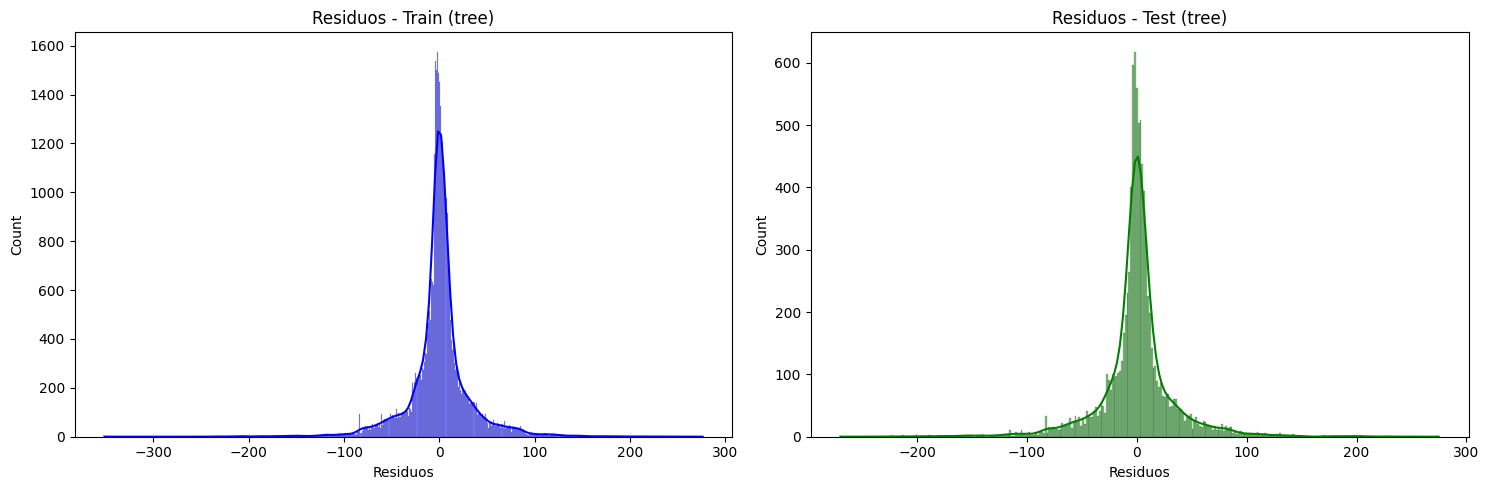

In [11]:
GestorModelo.plot_residuos("tree")

In [12]:
GestorModelo.calcular_metricas("tree")

,train,test
R2,0.62,0.60
MAE,20.18,20.46
MSE,"1,190.53","1,233.73"
RMSE,34.50,35.12


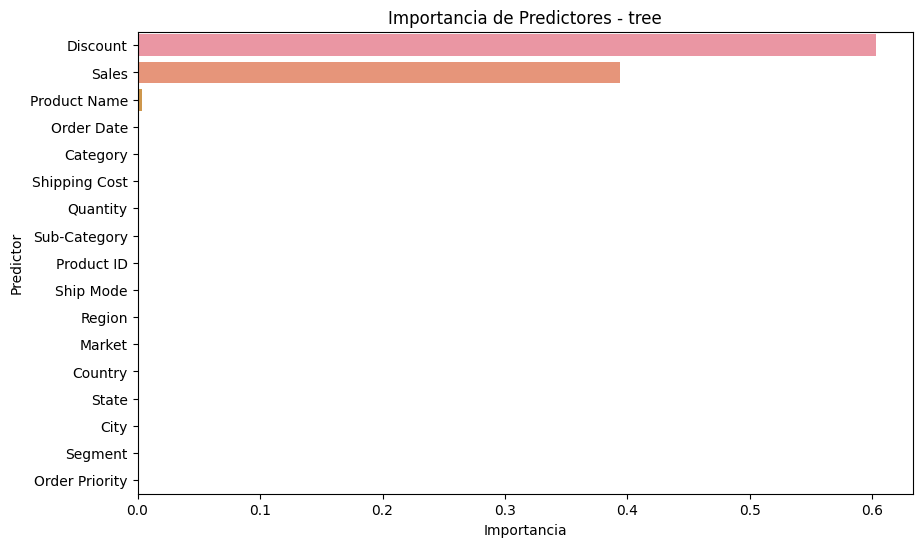

,Predictor,Importancia
14,Discount,0.60
12,Sales,0.39
11,Product Name,0.00
0,Order Date,0.00
9,Category,0.00
15,Shipping Cost,0.00
13,Quantity,0.00
10,Sub-Category,0.00
8,Product ID,0.00
1,Ship Mode,0.00


In [13]:
GestorModelo.importancia_predictores("tree")

In [15]:
params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
GestorModelo.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = GestorModelo.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
32374,55.56,27.62,Train,tree,27.94
22669,15.00,27.62,Train,tree,-12.62
20822,23.40,45.41,Train,tree,-22.01


In [16]:
GestorModelo.calcular_metricas("random_forest")

,train,test
R2,0.63,0.60
MAE,19.71,20.10
MSE,"1,160.10","1,218.93"
RMSE,34.06,34.91


In [18]:
params_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

GestorModelo.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = GestorModelo.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
32374,55.56,27.62,Train,tree,27.94
22669,15.00,27.62,Train,tree,-12.62
20822,23.40,45.41,Train,tree,-22.01


In [19]:
GestorModelo.calcular_metricas("gradient_boosting")

,train,test
R2,0.75,0.64
MAE,16.75,18.68
MSE,775.80,"1,122.23"
RMSE,27.85,33.50


In [20]:
params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

# llamamos a la función para ajustar el modelo
GestorModelo.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = GestorModelo.obtener_resultados()
df_resultados_xgboost.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
32374,55.56,27.62,Train,tree,27.94
22669,15.00,27.62,Train,tree,-12.62
20822,23.40,45.41,Train,tree,-22.01


In [21]:
GestorModelo.calcular_metricas("xgboost")

,train,test
R2,0.75,0.64
MAE,16.69,18.50
MSE,783.04,"1,102.66"
RMSE,27.98,33.21


### Análisis de Modelos Predictivos

#### Resultados de los Modelos

| Modelo              | Métrica | Train   | Test    |
|---------------------|---------|---------|---------|
| **XGBoost**         | R²      | 0.75    | 0.64    |
|                     | RMSE    | 27.98   | 33.21   |
| **Gradient Boosting**| R²      | 0.75    | 0.64    |
|                     | RMSE    | 27.85   | 33.50   |
| **Random Forest**   | R²      | 0.63    | 0.60    |
|                     | RMSE    | 34.06   | 34.91   |
| **Árbol de Decisión**| R²      | 0.62    | 0.60    |
|                     | RMSE    | 34.50   | 35.12   |



### Análisis y Elección del Modelo

#### **1. XGBoost**
- **Rendimiento**:
  - Train: R² = 0.75, RMSE = 27.98
  - Test: R² = 0.64, RMSE = 33.21
- **Evaluación**:
  - Tiene un rendimiento fuerte en el conjunto de entrenamiento, pero muestra una caída notable en el conjunto de prueba.
  - **Problema identificado**: Es propenso a **overfitting**.

#### **2. Gradient Boosting**
- **Rendimiento**:
  - Train: R² = 0.75, RMSE = 27.85
  - Test: R² = 0.64, RMSE = 33.50
- **Evaluación**:
  - Rendimiento similar al de XGBoost, pero con un **comportamiento más balanceado** entre los conjuntos de entrenamiento y prueba.
  - Aunque el RMSE de prueba es ligeramente mayor que el de XGBoost, parece menos propenso al **overfitting**.

#### **3. Random Forest**
- **Rendimiento**:
  - Train: R² = 0.63, RMSE = 34.06
  - Test: R² = 0.60, RMSE = 34.91
- **Evaluación**:
  - Consistente entre los conjuntos de entrenamiento y prueba, mostrando **resistencia al overfitting**.
  - Sin embargo, el desempeño absoluto es peor en comparación con los modelos de Boosting.

#### **4. Árbol de Decisión Simple**
- **Rendimiento**:
  - Train: R² = 0.62, RMSE = 34.50
  - Test: R² = 0.60, RMSE = 35.12
- **Evaluación**:
  - Consistente y simple, pero tiene el peor desempeño absoluto en comparación con los otros modelos.
  - Ventaja: Mayor interpretabilidad.

---

### **Mehor Modelo: Gradient Boosting**
- **Razones**:
  - Buen compromiso entre **precisión predictiva** y **generalización**.
  - Menor riesgo de **overfitting** en comparación con XGBoost.
  - Mantiene un desempeño fuerte tanto en entrenamiento como en prueba.

> Si el objetivo es minimizar el sobreajuste y garantizar un desempeño sólido en datos no vistos, **Gradient Boosting** es la mejor opción.
